<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/ML-Manuel/TFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 647, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 647 (delta 81), reused 25 (delta 25), pack-reused 517 (from 3)
Receiving objects: 100% (647/647), 68.11 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (334/334), done.
/content/DATCapstone/data/DATCapstone/data


## Preprocessing for Random Forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [ ]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)

# Convert date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])


In [ ]:
#Read Data
# df = pd.read_csv('/Users/wonminkim/Projects/DATCapstone/data2/data.csv', index_col=0)
# Correct path for ZIP file
zip_path = '/content/DATCapstone/data/_data.csv.zip'

# Extract specific file from ZIP
with ZipFile(zip_path, 'r') as z:
    with z.open('data.csv') as f:  # Explicitly specify the file to extract
        df = pd.read_csv(f, index_col=0)


df['Date'] = pd.to_datetime(df['Date'])

#Forward fill -> micro, macro, stock / fill na -> sentiment
df[df.columns[1:40]] = df.groupby('Ticker')[df.columns[1:40]].ffill()
df[df.columns[40:-5]] = df[df.columns[40:-5]].fillna(0)

df = df.dropna(subset=df.columns[0:-5])

# Sorting
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Lag feature (Exclude embedding columns)
lag_cols = df.columns[1:44]
lags = [1, 3, 5, 7, 14, 30]
lag_features = []

for col in lag_cols:
    for lag in lags:
        lagged = df.groupby('Ticker')[col].shift(lag)
        lag_features.append(lagged.rename(f'{col}_lag{lag}'))

lag_df = pd.concat(lag_features, axis=1)

df = pd.concat([df.reset_index(drop=True), lag_df.reset_index(drop=True)], axis=1)

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,neutral_lag5,neutral_lag7,neutral_lag14,neutral_lag30,positive_lag1,positive_lag3,positive_lag5,positive_lag7,positive_lag14,positive_lag30
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,2025-01-27,124.788521,128.388181,116.689260,118.409103,818830900,0.0,0.0,29723.864,4.0,...,0.571282,0.000000,0.999946,0.001172,0.000712,0.053954,0.048698,0.000000,0.000014,0.000014
5628,2025-01-28,121.798801,128.988143,116.239315,128.978149,579666400,0.0,0.0,29723.864,4.0,...,0.083897,0.333974,0.256342,0.007833,0.182257,0.013230,0.374254,0.000178,0.199403,0.000346
5629,2025-01-29,126.488367,126.878331,120.038963,123.688622,467120600,0.0,0.0,29723.864,4.0,...,0.140121,0.571282,0.181732,0.032715,0.119110,0.000712,0.053954,0.048698,0.013047,0.000541
5630,2025-01-30,123.088674,124.988501,118.089134,124.638535,392925500,0.0,0.0,29723.864,4.0,...,0.307131,0.083897,0.476841,0.000166,0.001830,0.182257,0.013230,0.374254,0.153314,0.001441


In [ ]:
import glob
import pandas as pd

# Correct path for article CSVs in Google Colab
csv_files = glob.glob('/content/DATCapstone/data/*articles*.csv')
print("Found files:", csv_files)  # Debugging


Found files: ['/content/DATCapstone/data/AVGO_articles..csv', '/content/DATCapstone/data/META_articles..csv', '/content/DATCapstone/data/TSLA_articles..csv', '/content/DATCapstone/data/ADBE_articles.csv', '/content/DATCapstone/data/NVDA_articles..csv', '/content/DATCapstone/data/MSFT_articles..csv', '/content/DATCapstone/data/AAPL_articles.csv', '/content/DATCapstone/data/NFLX_articles..csv', '/content/DATCapstone/data/GOOGL_articles..csv', '/content/DATCapstone/data/AMZN_articles..csv']


In [ ]:
!ls /content/DATCapstone/data/*articles*.csv


/content/DATCapstone/data/AAPL_articles.csv
/content/DATCapstone/data/ADBE_articles.csv
/content/DATCapstone/data/AMZN_articles..csv
/content/DATCapstone/data/AVGO_articles..csv
/content/DATCapstone/data/GOOGL_articles..csv
/content/DATCapstone/data/META_articles..csv
/content/DATCapstone/data/MSFT_articles..csv
/content/DATCapstone/data/NFLX_articles..csv
/content/DATCapstone/data/NVDA_articles..csv
/content/DATCapstone/data/TSLA_articles..csv


In [ ]:
if not csv_files:
    print("No article files found. Initializing empty columns.")
    df_articles = pd.DataFrame(columns=['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive'])
else:
    # Your existing processing code
    df_articles_list = []
    for file in csv_files:
        ticker = os.path.basename(file).split('_')[0]
        df_articles = pd.read_csv(file)
        df_articles['Ticker'] = ticker
        df_articles_list.append(df_articles)

    df_articles = pd.concat(df_articles_list, ignore_index=True)

    # Preprocessing steps...
# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [ ]:
import glob

# Read articles df
csv_files = glob.glob(os.path.join("*_articles*.csv")) # Updated to reflect file naming pattern

df_articles_list = []

for file in csv_files:
    # get ticker from filename
    ticker = os.path.basename(file).split('_')[0]
    df_articles = pd.read_csv(file)
    df_articles['Ticker'] = ticker
    df_articles_list.append(df_articles)

# concat articles dataframe
df_articles = pd.concat(df_articles_list, ignore_index=True)

# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [ ]:
print(df_articles.columns)

Index(['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral',
       'Articles_positive', 'Articles_avg_sentiment'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=0.95, random_state=42)
emb_cols = [col for col in df.columns if col.startswith("emb_")]
X_emb = df[emb_cols]
X_emb_pca = pca.fit_transform(X_emb)

# PCA columns
pca_columns = [f"emb_pca_{i}" for i in range(X_emb_pca.shape[1])]
df_pca_part = pd.DataFrame(X_emb_pca, columns=pca_columns, index=df.index)
df_non_pca = df.drop(columns=emb_cols)

df_pca = pd.concat([df_non_pca.reset_index(drop=True), df_pca_part.reset_index(drop=True)], axis=1)

# 결과 확인
df_pca.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_pca_74,emb_pca_75,emb_pca_76,emb_pca_77,emb_pca_78,emb_pca_79,emb_pca_80,emb_pca_81,emb_pca_82,emb_pca_83
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022


## Preprocessing for TFT

In [ ]:
# Data Preprocessing Helper for TFT Model
# This script helps prepare your data for the TFT model

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data_for_tft(df, target_col='Close', prediction_horizon=1,
                           encoder_length=30, use_embeddings=False,
                           pca_components=10, test_size=0.2):
    """
    Preprocess data for the Temporal Fusion Transformer model.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing stock data
    target_col : str
        Column name to predict (default: 'Close')
    prediction_horizon : int
        Number of days ahead to predict (default: 1)
    encoder_length : int
        Number of days to use as context for prediction (default: 30)
    use_embeddings : bool
        Whether to keep embedding columns (default: False)
    pca_components : int
        Number of PCA components if reducing embeddings (default: 10)
    test_size : float
        Fraction of data to use for testing (default: 0.2)

    Returns:
    --------
    pandas.DataFrame
        Processed dataframe ready for TFT model
    """
    print(f"Input dataframe shape: {df.shape}")

    # Ensure Date is datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])

    # Sort by Ticker and Date
    if 'Ticker' in df.columns:
        df = df.sort_values(['Ticker', 'Date'])
    else:
        raise ValueError("DataFrame must have a 'Ticker' column")

    # Remove lag features as TFT handles time dependencies
    lag_columns = [col for col in df.columns if '_lag' in col]
    print(f"Removing {len(lag_columns)} lag columns")
    df_no_lag = df.drop(columns=lag_columns)

    # Handle embedding columns
    emb_columns = [col for col in df_no_lag.columns if col.startswith('emb_')]
    print(f"Found {len(emb_columns)} embedding columns")

    if len(emb_columns) > 0:
        if not use_embeddings:
            # Option 1: Remove embeddings
            df_processed = df_no_lag.drop(columns=emb_columns)
            print("Embeddings removed")
        else:
            # Option 2: Reduce dimensions with PCA
            print(f"Reducing embeddings to {pca_components} components with PCA")
            # Check for null values in embedding columns
            null_counts = df_no_lag[emb_columns].isnull().sum()
            if null_counts.sum() > 0:
                print(f"Warning: Found {null_counts.sum()} null values in embedding columns")
                # Fill nulls with 0 for PCA
                df_no_lag[emb_columns] = df_no_lag[emb_columns].fillna(0)

            # Apply PCA
            emb_data = df_no_lag[emb_columns].values
            pca = PCA(n_components=pca_components)
            emb_pca = pca.fit_transform(emb_data)

            # Create new dataframe with PCA components
            df_processed = df_no_lag.drop(columns=emb_columns)
            for i in range(pca_components):
                df_processed[f'emb_pca_{i}'] = emb_pca[:, i]

            # Print variance explained
            var_explained = pca.explained_variance_ratio_.sum()
            print(f"PCA captures {var_explained:.2%} of embedding variance")
    else:
        df_processed = df_no_lag

    # Create time index for TFT
    df_processed['time_idx'] = df_processed.groupby('Ticker')['Date'].rank(method='dense').astype(int) - 1

    # Create train/test split
    cutoffs = {}
    for ticker in df_processed['Ticker'].unique():
        ticker_data = df_processed[df_processed['Ticker'] == ticker]
        cutoffs[ticker] = ticker_data['time_idx'].max() * (1 - test_size)

    df_processed['is_train'] = True
    for ticker, cutoff in cutoffs.items():
        df_processed.loc[(df_processed['Ticker'] == ticker) &
                        (df_processed['time_idx'] > cutoff), 'is_train'] = False



# TFT Model 1 (Obsolete)

## Libraries

In [ ]:
# Install
!pip install pytorch-lightning
!pip install pytorch-forecasting

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import torch

In [ ]:
# PyTorch Lightning and PyTorch Forecasting
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss, MAE, RMSE
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder

# Scikit-learn for metrics and preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

## Setup

In [ ]:
# Set random seeds for reproducibility
pl.seed_everything(42)
torch.manual_seed(42)
np.random.seed(42)

INFO:lightning_fabric.utilities.seed:Seed set to 42


In [ ]:
# ========== 2. Resolving the NaN/Inf Target Issue ==========
# First, inspect Target_1day before any operations
print(f"Original dataframe shape: {df.shape}")
print(f"Total NaN in Target_1day: {df['Target_1day'].isna().sum()}")
print(f"Total inf in Target_1day: {np.isinf(df['Target_1day']).sum()}")

# Create a deep copy to avoid modifying the original df
working_df = df.copy()

# Very aggressive approach to handle Target_1day
# 1. First, let's print some statistics about Target_1day
target_val = working_df['Target_1day']
print(f"\nTarget_1day stats before cleaning:")
print(f"Min: {target_val.min()}")
print(f"Max: {target_val.max()}")
print(f"Mean: {target_val.mean()}")
print(f"Std: {target_val.std()}")

# 2. Replace NaN and inf with 0 in the target column
working_df['Target_1day'] = working_df['Target_1day'].replace([np.nan, np.inf, -np.inf], 0)

# 3. Verify the target is free of NaN and inf
print(f"\nAfter replacement:")
print(f"NaN in Target_1day: {working_df['Target_1day'].isna().sum()}")
print(f"Inf in Target_1day: {np.isinf(working_df['Target_1day']).sum()}")

# ========== 3. Additional Feature Checks ==========
# Create time index for TFT
working_df = working_df.sort_values(['Ticker', 'Date'])
working_df['time_idx'] = working_df.groupby('Ticker').cumcount()

# Define simple feature sets - using only crucial features that don't have NaN issues
categorical_vars = ['Ticker']

# Focus on a minimal set of relevant financial features
basic_features = [
    'Dividends', 'Stock Splits',
    'GDP (Billions USD)', 'Unemployment Rate (%)',
    'Producer Price Index (PPI)', 'Consumer Confidence Index',
    'Total Revenue', 'Operating Income', 'Net Income',
    'EBITDA', 'Gross Profit'
]

# Check which features exist and don't have NaN issues
valid_features = []
for col in basic_features:
    if col in working_df.columns:
        nan_count = working_df[col].isna().sum()
        inf_count = np.isinf(working_df[col]).sum()

        if nan_count > 0 or inf_count > 0:
            print(f"Feature {col}: {nan_count} NaNs, {inf_count} infs - filling with 0")
            working_df[col] = working_df[col].replace([np.nan, np.inf, -np.inf], 0)

        valid_features.append(col)

# Final features
continuous_vars = valid_features

print(f"\nSelected features:")
print(f"- Categorical ({len(categorical_vars)}): {categorical_vars}")
print(f"- Continuous ({len(continuous_vars)}): {continuous_vars}")
print(f"Total features: {len(categorical_vars) + len(continuous_vars)}")


Original dataframe shape: (5632, 1083)
Total NaN in Target_1day: 7
Total inf in Target_1day: 0

Target_1day stats before cleaning:
Min: -42.44155883789063
Max: 43.88923645019531
Mean: 0.10996016370985243
Std: 3.587426056358569

After replacement:
NaN in Target_1day: 0
Inf in Target_1day: 0

Selected features:
- Categorical (1): ['Ticker']
- Continuous (11): ['Dividends', 'Stock Splits', 'GDP (Billions USD)', 'Unemployment Rate (%)', 'Producer Price Index (PPI)', 'Consumer Confidence Index', 'Total Revenue', 'Operating Income', 'Net Income', 'EBITDA', 'Gross Profit']
Total features: 12


In [ ]:
# ========== 4. Create Training and Validation Sets ==========
# Set prediction parameters
MAX_PREDICTION_LENGTH = 1  # Predict 1 day ahead
MAX_ENCODER_LENGTH = 30    # Use 30 days of history for prediction

# Split data into train and validation sets
cutoff_date = working_df['Date'].max() - timedelta(days=30)
train_df = working_df[working_df['Date'] <= cutoff_date].copy()
val_df = working_df[working_df['Date'] > cutoff_date].copy()

print(f"\nTraining data: {train_df.shape} rows, {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Validation data: {val_df.shape} rows, {val_df['Date'].min()} to {val_df['Date'].max()}")

# Final verification - ensure there are absolutely no NaN or inf values in any used column
TARGET = "Target_1week"

print("\nFinal verification:")
for col in [TARGET] + continuous_vars:
    nan_count = train_df[col].isna().sum()
    inf_count = np.isinf(train_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs - fixing")
        train_df[col] = train_df[col].replace([np.nan, np.inf, -np.inf], 0)

    nan_count = val_df[col].isna().sum()
    inf_count = np.isinf(val_df[col]).sum()
    if nan_count > 0 or inf_count > 0:
        print(f"Warning: {col} still has {nan_count} NaNs and {inf_count} infs in validation - fixing")
        val_df[col] = val_df[col].replace([np.nan, np.inf, -np.inf], 0)


Training data: (5492, 1084) rows, 2021-06-30 00:00:00 to 2024-12-31 00:00:00
Validation data: (140, 1084) rows, 2025-01-02 00:00:00 to 2025-01-31 00:00:00

Final verification:



Creating TimeSeriesDataSet...
Error creating TimeSeriesDataSet: 2481 (45.17%) of Target_1week values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Target_1week, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values


ValueError: 2481 (45.17%) of Target_1week values were found to be NA or infinite (even after encoding). NA values are not allowed `allow_missing_timesteps` refers to missing rows, not to missing values. Possible strategies to fix the issue are (a) dropping the variable Target_1week, (b) using `NaNLabelEncoder(add_nan=True)` for categorical variables, (c) filling missing values and/or (d) optionally adding a variable indicating filled values

In [ ]:
# ========== 6. Create and Train TFT Model ==========
# Create the TFT model
tft = TemporalFusionTransformer.from_dataset(
    train_dataset,
    learning_rate=0.001,
    hidden_size=32,       # Reduced size to avoid overfitting
    attention_head_size=2,
    dropout=0.2,          # Increased dropout for regularization
    hidden_continuous_size=16,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=3,
    weight_decay=1e-2,
)

print(f"TFT model size: {tft.size()/1e3:.1f}k parameters")

# Define callbacks
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=1e-4,
    patience=5,
    verbose=True,
    mode="min"
)
lr_monitor = LearningRateMonitor(logging_interval="epoch")

# Initialize trainer
trainer = pl.Trainer(
    max_epochs=15,        # Reduced epochs for faster training
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    gradient_clip_val=0.1,
    callbacks=[early_stop_callback, lr_monitor],
    enable_model_summary=True,
    limit_train_batches=50,  # For faster training (remove for full training)
    limit_val_batches=20,    # For faster training (remove for full training)
)

print("\nStarting TFT model training...")
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)
print("Training completed!")

# Save the model
model_path = "tft_stock_model.ckpt"
trainer.save_checkpoint(model_path)
print(f"Model saved to {model_path}")

In [ ]:
# ========== 7. Evaluate Model ==========
# Make predictions
predictions = tft.predict(
    val_dataloader,
    return_x=True,
    return_y=True,
    mode="prediction"
)

# Extract actual and predicted values
actuals = []
predicted = []
tickers = []

# Get validation data
for x, y in iter(val_dataloader):
    actuals.extend(y[0].cpu().numpy().flatten())
    batch_tickers = x["groups"]["Ticker"]
    tickers.extend(batch_tickers)

# Get median predictions (quantile=0.5)
predicted = predictions.output.prediction.cpu().numpy()[:, 0, 0]

# Ensure we have the same number of predictions as actuals
min_len = min(len(actuals), len(predicted), len(tickers))
actuals = actuals[:min_len]
predicted = predicted[:min_len]
tickers = tickers[:min_len]

# Create results dataframe
results_df = pd.DataFrame({
    "Ticker": tickers,
    "Actual": actuals,
    "Predicted": predicted,
    "Error": predicted - actuals
})

# Calculate metrics
mae = mean_absolute_error(actuals, predicted)
mse = mean_squared_error(actuals, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actuals, predicted)

print("\n----- Validation Metrics -----")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# ========== 8. Visualize Results ==========
# Plot overall results
plt.figure(figsize=(12, 6))
sample_size = min(100, len(actuals))
plt.plot(actuals[:sample_size], label='Actual')
plt.plot(predicted[:sample_size], label='Predicted')
plt.title(f'Actual vs Predicted {TARGET}')
plt.xlabel('Sample Index')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.savefig('tft_prediction_results.png')
plt.show()

# Plot results by ticker
plt.figure(figsize=(15, 10))
ticker_list = list(results_df["Ticker"].unique())[:4]  # First 4 tickers
for i, ticker in enumerate(ticker_list):
    ticker_df = results_df[results_df["Ticker"] == ticker]
    if len(ticker_df) > 0:
        plt.subplot(2, 2, i+1)
        plt.plot(ticker_df["Actual"].values, label=f'Actual ({ticker})')
        plt.plot(ticker_df["Predicted"].values, label=f'Predicted ({ticker})')
        plt.title(f'Ticker: {ticker}')
        plt.xlabel('Sample Index')
        plt.ylabel('Price Change')
        plt.legend()
        plt.grid(True)
plt.tight_layout()
plt.savefig('tft_ticker_predictions.png')
plt.show()

# Analyze feature importance
print("\nAnalyzing feature importance...")
interpretation = tft.interpret_output(predictions.x, predictions.output)

# Plot feature importance
plt.figure(figsize=(15, 10))
tft.plot_interpretation(interpretation)
plt.tight_layout()
plt.savefig('tft_feature_importance.png')
plt.show()

# Print top features
if "encoder_variables" in interpretation:
    encoder_vars = tft.encoder_variables
    encoder_importance = interpretation["encoder_variables"][0].mean(0).mean(0).cpu().numpy()

    print("\nTop most important features:")
    for i, (var, imp) in enumerate(sorted(zip(encoder_vars, encoder_importance),
                                      key=lambda x: x[1], reverse=True)[:10]):
        print(f"{i+1}. {var}: {imp:.4f}")

print("\nTFT model evaluation completed!")

# New Model (To be built)

## Environment Setup

In [68]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 653 (delta 85), reused 25 (delta 25), pack-reused 517 (from 3)
Receiving objects: 100% (653/653), 68.12 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (338/338), done.
/content/DATCapstone/data/DATCapstone/data


In [69]:
!pip install pytorch-lightning
!pip install pytorch-forecasting

## Import

In [110]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
import lightning.pytorch as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, RMSE, SMAPE
import os
import warnings
warnings.filterwarnings('ignore')

In [111]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)


In [112]:
# Check if GPU is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

CUDA available: False
Using CPU


## Data Preparation

In [113]:
# =====================================================================
# Data Loading and Preprocessing
# =====================================================================

# Load the dataframe
print(f"Original dataframe shape: {df.shape}")

# Basic data exploration
print("\nFirst few rows:")
print(df.head())

print("\nUnique tickers:")
print(df['Ticker'].unique())
print(f"Number of unique tickers: {df['Ticker'].nunique()}")

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

Original dataframe shape: (8103, 817)

First few rows:
         Date       Open       High        Low      Close    Volume  \
0  2021-06-01  75.393341  75.630189  74.351213  75.383865  10485300   
1  2021-06-02  75.507015  76.672309  75.327016  76.047028  12249300   
2  2021-06-03  75.601763  77.174428  75.459653  76.823891  12038700   
3  2021-06-04  77.136525  79.542898  77.089160  78.529190  14502900   
4  2021-06-07  78.576573  79.817653  78.491304  79.523964  10445600   

   Dividends  Stock Splits  GDP (Billions USD)  Unemployment Rate (%)  ...  \
0        0.0           0.0           23368.861                    5.9  ...   
1        0.0           0.0           23368.861                    5.9  ...   
2        0.0           0.0           23368.861                    5.9  ...   
3        0.0           0.0           23368.861                    5.9  ...   
4        0.0           0.0           23368.861                    5.9  ...   

   emb_763  emb_764  emb_765  emb_766  emb_767  T

In [114]:
# =====================================================================
# TFT Model Preparation
# =====================================================================

# Remove lag features since TFT will handle time dependencies
lag_columns = [col for col in df.columns if '_lag' in col]
print(f"\nRemoving {len(lag_columns)} lag columns from the dataset")
df_no_lag = df.drop(columns=lag_columns)

# Handle embedding columns - Either keep them or use PCA to reduce dimensionality
# Identify embedding columns
emb_columns = [col for col in df_no_lag.columns if col.startswith('emb_')]
print(f"\nFound {len(emb_columns)} embedding columns")

# Option 1: Remove embedding columns since they might be too many for TFT
df_no_emb = df_no_lag.drop(columns=emb_columns)

# We'll work with the version without embeddings for simplicity
df_processed = df_no_emb



Removing 0 lag columns from the dataset

Found 768 embedding columns


In [115]:
# Select target and features for the model
target = 'Target_1day'  # Or could be 'Target_1day', or close, or other targets

# Select relevant features for prediction
# Exclude Date, target variables, and other non-predictive columns
exclude_columns = ['Date'] + [col for col in df_processed.columns if col.startswith('Target_')]
if target not in exclude_columns:
    exclude_columns.append(target)

features = [col for col in df_processed.columns if col not in exclude_columns]
print(f"\nUsing {len(features)} features for prediction")

# Prepare data for TFT
# Sort data by ticker and date
df_processed['time_idx'] = df_processed.groupby('Ticker')['Date'].rank(method='dense').astype(int) - 1

# Calculate the max prediction length based on your targets
# If predicting Target_1day, max_prediction_length=1
# If predicting Target_1week, max_prediction_length=5 (assuming 5 trading days)
# If predicting Target_1month, max_prediction_length=20
max_prediction_length = 1  # Adjust based on your prediction horizon

# Set the number of days to use as context for the model
max_encoder_length = 30  # Use 30 days of history for prediction

# Define time index for TFT
# We need to create a time_idx column that increases for each date
# Verify time_idx is properly set for each ticker
for ticker in df_processed['Ticker'].unique():
    ticker_data = df_processed[df_processed['Ticker'] == ticker]
    print(f"{ticker}: time_idx from {ticker_data['time_idx'].min()} to {ticker_data['time_idx'].max()}")




Using 44 features for prediction
ORCL: time_idx from 0 to 922
MSFT: time_idx from 0 to 901
AAPL: time_idx from 0 to 837
AVGO: time_idx from 0 to 815
AMD: time_idx from 0 to 773
AMZN: time_idx from 0 to 773
GOOGL: time_idx from 0 to 773
META: time_idx from 0 to 773
TSLA: time_idx from 0 to 773
NVDA: time_idx from 0 to 753


In [116]:
# Create a training dataset
# Use the last 20% of the data for testing
val_cutoff = df_processed['time_idx'].max() - max_prediction_length
cutoffs = {}
for ticker in df_processed['Ticker'].unique():
    ticker_data = df_processed[df_processed['Ticker'] == ticker]
    cutoffs[ticker] = ticker_data['time_idx'].max() * 0.8

df_processed['is_train'] = True
for ticker, cutoff in cutoffs.items():
    df_processed.loc[(df_processed['Ticker'] == ticker) &
                    (df_processed['time_idx'] > cutoff), 'is_train'] = False

In [117]:
# Check which columns have missing values
missing_columns = df_processed.isna().sum()
print("\nColumns with missing values:")
print(missing_columns[missing_columns > 0].sort_values(ascending=False))

# Check for infinite values
df_processed = df_processed.replace([np.inf, -np.inf], np.nan)

# Handle missing values in Inventory specifically (since that's causing the error)
if 'Inventory' in df_processed.columns:
    # For each ticker, fill missing Inventory values with median (or 0 if median is NaN)
    for ticker in df_processed['Ticker'].unique():
        ticker_mask = df_processed['Ticker'] == ticker
        ticker_inventory_median = df_processed.loc[ticker_mask, 'Inventory'].median()
        if pd.isna(ticker_inventory_median):
            ticker_inventory_median = 0
        df_processed.loc[ticker_mask, 'Inventory'] = df_processed.loc[ticker_mask, 'Inventory'].fillna(ticker_inventory_median)

# Check all features for missing values and fill appropriately
for feature in features:
    if df_processed[feature].isna().sum() > 0:
        print(f"Filling missing values in {feature}")
        # Fill by ticker
        for ticker in df_processed['Ticker'].unique():
            ticker_mask = df_processed['Ticker'] == ticker
            feature_median = df_processed.loc[ticker_mask, feature].median()
            if pd.isna(feature_median):  # If median is NaN (all values are NaN)
                feature_median = 0
            df_processed.loc[ticker_mask, feature] = df_processed.loc[ticker_mask, feature].fillna(feature_median)

# Verify all missing values are fixed
remaining_missing = df_processed[features].isna().sum()
if remaining_missing.sum() > 0:
    print("Warning: There are still missing values:")
    print(remaining_missing[remaining_missing > 0])
else:
    print("All missing values have been handled.")


Columns with missing values:
neutral                        5378
negative                       5378
vote                           5378
positive                       5378
Target_1year                   2500
Inventory                      1697
Repurchase Of Capital Stock     774
Long Term Debt                  252
Target_1month                   200
Target_1week                     50
Target_1day                      10
dtype: int64
Filling missing values in Long Term Debt
Filling missing values in Repurchase Of Capital Stock
Filling missing values in vote
Filling missing values in negative
Filling missing values in neutral
Filling missing values in positive
All missing values have been handled.


In [118]:
from pytorch_forecasting.data.encoders import NaNLabelEncoder # Import NaNLabelEncoder

In [186]:
# Before creating the TimeSeriesDataSet, ensure the time_idx is properly set
df_processed['time_idx'] = df_processed.groupby('Ticker')['Date'].rank(method='dense').astype(int) - 1

# Verify time_idx is properly set for each ticker
for ticker in df_processed['Ticker'].unique():
    ticker_data = df_processed[df_processed['Ticker'] == ticker]
    print(f"{ticker}: time_idx from {ticker_data['time_idx'].min()} to {ticker_data['time_idx'].max()}")

# Recreate the training dataset with minimal configuration
reduced_features = features[:20]  # Use only the first 20 features to simplify

training = TimeSeriesDataSet(
    data=df_processed[df_processed['is_train']],
    time_idx="time_idx",
    target=target,
    group_ids=["Ticker"],
    min_encoder_length=15,  # Reduced from 30
    max_encoder_length=15,  # Reduced from 30
    min_prediction_length=1,
    max_prediction_length=1,
    static_categoricals=["Ticker"],
    static_reals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=reduced_features,  # Use reduced feature set
    target_normalizer=GroupNormalizer(
        groups=["Ticker"], transformation="softplus"
    ),
    categorical_encoders={
        "Ticker": NaNLabelEncoder(add_nan=True)
    },
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

ORCL: time_idx from 0 to 922
MSFT: time_idx from 0 to 901
AAPL: time_idx from 0 to 837
AVGO: time_idx from 0 to 815
AMD: time_idx from 0 to 773
AMZN: time_idx from 0 to 773
GOOGL: time_idx from 0 to 773
META: time_idx from 0 to 773
TSLA: time_idx from 0 to 773
NVDA: time_idx from 0 to 753


In [187]:
# Check if lag features are already in the dataframe
print("Lag feature verification:")
lag_features = [col for col in df.columns if '_lag' in col]
print(f"Number of lag features in original dataframe: {len(lag_features)}")

# If dataframe doesn't have lag features already, we need to create them
if len(lag_features) == 0:
    print("No lag features found in dataframe. These will be handled by TFT automatically.")
else:
    print("Lag features found in dataframe. Consider removing them to let TFT handle temporal dependencies.")
    # Optional: remove lag features
    print(f"First few lag features: {lag_features[:5]}")

Lag feature verification:
Number of lag features in original dataframe: 0
No lag features found in dataframe. These will be handled by TFT automatically.


In [188]:
# Verify ticker sequence organization
ticker_counts = df_processed.groupby('Ticker').size()
print("\nRows per ticker:")
print(ticker_counts)

# Check if there are enough data points per ticker for the encoder length
min_required = max_encoder_length + max_prediction_length
print(f"\nTickers with insufficient data (<{min_required} points):")
print(ticker_counts[ticker_counts < min_required])

# Show time index consistency by ticker
print("\nTime index range by ticker:")
for ticker in df_processed['Ticker'].unique():
    ticker_data = df_processed[df_processed['Ticker'] == ticker]
    print(f"{ticker}: {ticker_data['time_idx'].min()} to {ticker_data['time_idx'].max()} ({len(ticker_data)} rows)")


Rows per ticker:
Ticker
AAPL     838
AMD      774
AMZN     774
AVGO     816
GOOGL    774
META     774
MSFT     902
NVDA     754
ORCL     923
TSLA     774
dtype: int64

Tickers with insufficient data (<31 points):
Series([], dtype: int64)

Time index range by ticker:
ORCL: 0 to 922 (923 rows)
MSFT: 0 to 901 (902 rows)
AAPL: 0 to 837 (838 rows)
AVGO: 0 to 815 (816 rows)
AMD: 0 to 773 (774 rows)
AMZN: 0 to 773 (774 rows)
GOOGL: 0 to 773 (774 rows)
META: 0 to 773 (774 rows)
TSLA: 0 to 773 (774 rows)
NVDA: 0 to 753 (754 rows)


In [189]:
# First, check which rows have NA values in Target_1day
na_rows = df_processed[df_processed['Target_1day'].isna()]
print(f"Number of rows with NA in Target_1day: {len(na_rows)}")

# These are likely the last few rows in each ticker's data (can't calculate target for final day)
# Explicitly fill NA values for Target_1day using forward fill, then backward fill
df_processed['Target_1day'] = df_processed['Target_1day'].fillna(0)  # Fill with 0 or another appropriate value

# Verify all NAs are gone
print(f"NAs remaining in Target_1day: {df_processed['Target_1day'].isna().sum()}")

Number of rows with NA in Target_1day: 0
NAs remaining in Target_1day: 0


In [192]:
# Create validation dataset using the same parameters as training
validation = TimeSeriesDataSet.from_dataset(
    training, df_processed[~df_processed['is_train']], predict=True, stop_randomization=True
)

# Create dataloaders for model training
batch_size = 32  # Adjust based on your GPU memory
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0, shuffle=False)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0, shuffle=False)

## Training

In [193]:
# =====================================================================
# TFT Model Training
# =====================================================================

# Create the TFT model
pl.seed_everything(42)  # For reproducibility

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

In [194]:
# Import the pl module wrapper
from pytorch_forecasting.models.base_model import BaseModelWithCovariates

# Create the TFT model properly as a LightningModule
tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.01,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=RMSE(),
    log_interval=10,
    reduce_on_plateau_patience=5,
)

# Confirm it's a LightningModule
print(f"Is LightningModule: {isinstance(tft, pl.LightningModule)}")

Is LightningModule: True


In [195]:
# Configure trainer
early_stop_callback = pl.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min"
)
lr_logger = pl.callbacks.LearningRateMonitor()

trainer = pl.Trainer(
    max_epochs=30,
    accelerator='auto',  # Use GPU if available
    gradient_clip_val=0.1,
    limit_train_batches=30,  # Adjust based on dataset size
    callbacks=[early_stop_callback, lr_logger],
)

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [196]:
# Train the model
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | RMSE                            | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 66     | train
3  | prescalers                         | ModuleDict                      | 400    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 1.8 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 15.8 K | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## Model Evaluation and Prediction

In [198]:
# Make predictions on the validation set
predictions = tft.predict(val_dataloader, return_y=True)

# Extract raw predictions and actual values
raw_predictions = predictions.output.detach().cpu().numpy()
# Access the target tensor within the tuple
raw_actuals = predictions.y[0].detach().cpu().numpy()

# Convert predictions to dataframe for easier analysis
pred_df = pd.DataFrame({
    'prediction': raw_predictions.flatten(),
    'actual': raw_actuals.flatten()
})

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [199]:
# Calculate metrics
mae = mean_absolute_error(pred_df['actual'], pred_df['prediction'])
mse = mean_squared_error(pred_df['actual'], pred_df['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(pred_df['actual'], pred_df['prediction'])

In [200]:
print("\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



Model Performance:
MAE: 0.0006
MSE: 0.0000
RMSE: 0.0013
R²: 0.0000


## Visualization

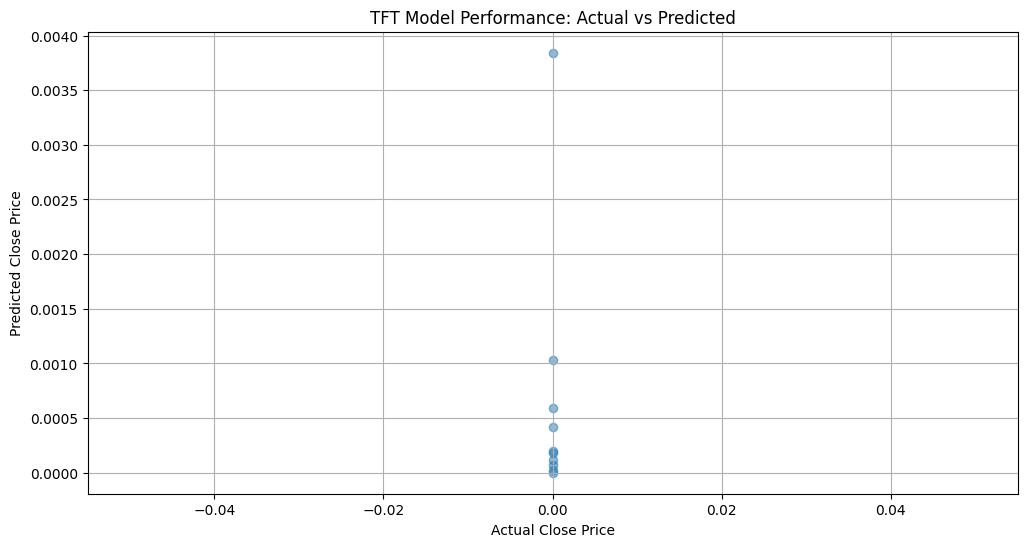

In [201]:
# Visualize predictions vs actuals
plt.figure(figsize=(12, 6))
plt.scatter(pred_df['actual'], pred_df['prediction'], alpha=0.5)
plt.plot([pred_df['actual'].min(), pred_df['actual'].max()],
         [pred_df['actual'].min(), pred_df['actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('TFT Model Performance: Actual vs Predicted')
plt.grid(True)
plt.savefig('tft_performance.png')
plt.show()

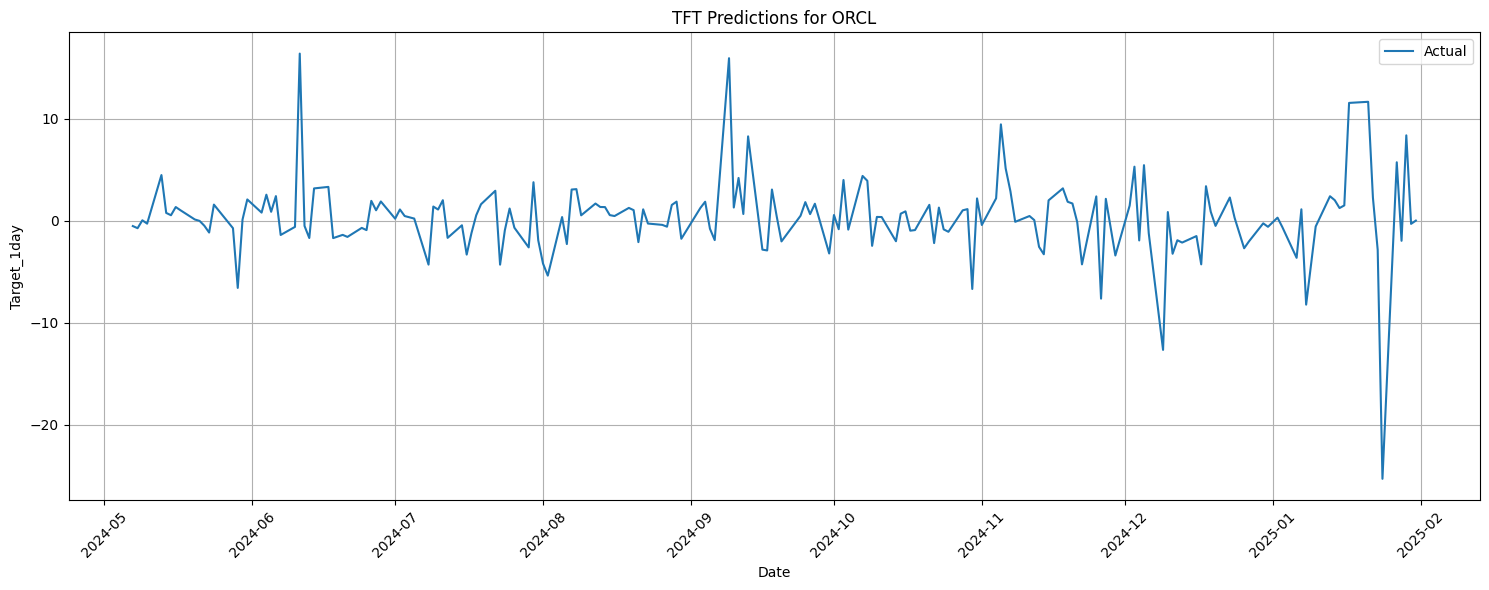

In [202]:
# Visualize predictions vs actuals over time for a specific stock
ticker_to_plot = df_processed['Ticker'].unique()[0]  # Choose first ticker
ticker_val_data = df_processed[(df_processed['Ticker'] == ticker_to_plot) & (~df_processed['is_train'])].copy()

# Get predictions for this ticker
# This will be more complex and would require matching predictions to the right dates
# Here's a simplified approach - you'll need to adapt this to your specific situation
if len(ticker_val_data) > 0:
    plt.figure(figsize=(15, 6))
    plt.plot(ticker_val_data['Date'], ticker_val_data[target], label='Actual')
    # You would add predictions here, after matching them to dates
    # plt.plot(ticker_val_data['Date'], ticker_predictions, label='Predicted')
    plt.title(f'TFT Predictions for {ticker_to_plot}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'tft_predictions_{ticker_to_plot}.png')
    plt.show()

## Feature Importance

In [203]:
# Get feature importance from the TFT model
importances = tft.interpret_output(val_dataloader, reduction="mean")

TypeError: 'DataLoader' object is not subscriptable

In [204]:
# Variable importance
plt.figure(figsize=(10, 8))
order = importances.mean(dim=["variable", "observation"]).argsort(descending=True)
plt.imshow(importances.mean(dim="observation").index_select(0, order), aspect="auto")
plt.title("Feature Importance")
plt.ylabel("Feature")
plt.colorbar()
plt.savefig('tft_feature_importance.png')
plt.show()

NameError: name 'importances' is not defined

<Figure size 1000x800 with 0 Axes>

In [205]:
# TFT Model Visualization Toolkit
# This script provides visualization tools for analyzing TFT model predictions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch
from pytorch_forecasting.models.temporal_fusion_transformer.visualization import plot_attention

def visualize_predictions(predictions, actuals, dates=None, ticker=None):
    """
    Visualize model predictions vs actual values.

    Parameters:
    -----------
    predictions : array-like
        Model predictions
    actuals : array-like
        Actual values
    dates : array-like, optional
        Dates corresponding to predictions/actuals
    ticker : str, optional
        Ticker symbol for the plot title
    """
    # Convert to numpy arrays if needed
    if isinstance(predictions, torch.Tensor):
        predictions = predictions.detach().cpu().numpy()
    if isinstance(actuals, torch.Tensor):
        actuals = actuals.detach().cpu().numpy()

    # Reshape if needed
    if len(predictions.shape) > 1:
        predictions = predictions.flatten()
    if len(actuals.shape) > 1:
        actuals = actuals.flatten()

    # Calculate metrics
    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predictions)

    # Create DataFrame for easier plotting
    results_df = pd.DataFrame({
        'Actual': actuals,
        'Predicted': predictions
    })

    if dates is not None:
        results_df['Date'] = dates

    # Create plots
    fig, axes = plt.subplots(2, 1, figsize=(14, 12))

    # Scatter plot
    axes[0].scatter(actuals, predictions, alpha=0.5)
    min_val = min(actuals.min(), predictions.min())
    max_val = max(actuals.max(), predictions.max())
    axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    title = "Prediction Performance"
    if ticker:
        title += f" for {ticker}"
    axes[0].set_title(title)
    axes[0].grid(True)

    # Display metrics on the plot
    text = f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}"
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[0].text(0.05, 0.95, text, transform=axes[0].transAxes,
                verticalalignment='top', bbox=props)

    # Time series plot if dates are provided
    if dates is not None:
        axes[1].plot(dates, actuals, label='Actual', marker='o', markersize=4)
        axes[1].plot(dates, predictions, label='Predicted', marker='x', markersize=4)
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Value')
        axes[1].set_title('Time Series Comparison')
        axes[1].legend()
        axes[1].grid(True)
        plt.xticks(rotation=45)
    else:
        # Show residuals if dates not available
        residuals = actuals - predictions
        sns.histplot(residuals, kde=True, ax=axes[1])
        axes[1].set_xlabel('Residuals')
        axes[1].set_ylabel('Frequency')
        axes[1].set_title('Distribution of Residuals')
        axes[1].axvline(x=0, color='r', linestyle='--')
        axes[1].grid(True)

        # Add residual statistics
        res_mean = np.mean(residuals)
        res_std = np.std(residuals)
        text = f"Mean: {res_mean:.4f}\nStd Dev: {res_std:.4f}"
        axes[1].text(0.05, 0.95, text, transform=axes[1].transAxes,
                    verticalalignment='top', bbox=props)

    plt.tight_layout()
    return fig, results_df

def plot_prediction_by_ticker(df, predictions, actuals, target_col='Close'):
    """
    Plot predictions for each ticker separately.

    Parameters:
    -----------
    df : pandas.DataFrame
        Original dataframe with Date and Ticker info
    predictions : array-like
        Model predictions
    actuals : array-like
        Actual values
    target_col : str
        Name of the target column
    """
    # Ensure df has 'is_train' column to identify test set
    if 'is_train' not in df.columns:
        print("Warning: 'is_train' column not found. Can't identify test set.")
        return

    # Get test data
    test_df = df[~df['is_train']].copy()

    # Check if dimensions match
    if len(test_df) != len(predictions):
        print(f"Warning: Test set size ({len(test_df)}) doesn't match predictions size ({len(predictions)})")
        print("Will try to align data by index.")

        # Try to match predictions to test set
        if isinstance(predictions, pd.Series):
            test_df['Predicted'] = predictions.values[:len(test_df)]
        else:
            test_df['Predicted'] = predictions[:len(test_df)]

        if isinstance(actuals, pd.Series):
            test_df['Actual'] = actuals.values[:len(test_df)]
        else:
            test_df['Actual'] = actuals[:len(test_df)]
    else:
        # Add predictions and actuals to test df
        test_df['Predicted'] = predictions
        test_df['Actual'] = actuals

    # Loop through tickers and create plots
    for ticker in test_df['Ticker'].unique():
        ticker_df = test_df[test_df['Ticker'] == ticker].sort_values('Date')

        if len(ticker_df) == 0:
            continue

        # Get date range for this ticker
        start_date = ticker_df['Date'].min()
        end_date = ticker_df['Date'].max()

        # Get training data for context
        train_df = df[(df['Ticker'] == ticker) &
                      (df['Date'] < end_date) &
                      (df['Date'] >= start_date - pd.Timedelta(days=60))].copy()

        # Create combined dataframe for plotting
        plot_df = pd.concat([
            train_df[['Date', target_col]].assign(Type='Training'),
            ticker_df[['Date', 'Actual']].rename(columns={'Actual': target_col}).assign(Type='Actual'),
            ticker_df[['Date', 'Predicted']].rename(columns={'Predicted': target_col}).assign(Type='Predicted')
        ])

        # Calculate metrics for this ticker
        ticker_mae = mean_absolute_error(ticker_df['Actual'], ticker_df['Predicted'])
        ticker_rmse = np.sqrt(mean_squared_error(ticker_df['Actual'], ticker_df['Predicted']))
        ticker_r2 = r2_score(ticker_df['Actual'], ticker_df['Predicted'])

        # Plot
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=plot_df, x='Date', y=target_col, hue='Type',
                    style='Type', markers=True, dashes=False)

        plt.title(f"{ticker} - {target_col} Prediction (MAE: {ticker_mae:.4f}, RMSE: {ticker_rmse:.4f}, R²: {ticker_r2:.4f})")
        plt.xlabel('Date')
        plt.ylabel(target_col)
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Also show detailed statistics
        print(f"\n{ticker} Prediction Performance:")
        print(f"MAE: {ticker_mae:.4f}")
        print(f"RMSE: {ticker_rmse:.4f}")
        print(f"R²: {ticker_r2:.4f}")

        # Show prediction error distribution
        plt.figure(figsize=(10, 5))
        errors = ticker_df['Actual'] - ticker_df['Predicted']
        sns.histplot(errors, kde=True)
        plt.title(f"{ticker} - Prediction Error Distribution")
        plt.xlabel('Error')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.grid(True)
        plt.show()

def visualize_feature_importance(tft_model, interpretation, top_n=10):
    """
    Visualize feature importance from a trained TFT model.

    Parameters:
    -----------
    tft_model : TemporalFusionTransformer
        Trained TFT model
    interpretation : dict
        Output from tft_model.interpret_output()
    top_n : int
        Number of top features to display
    """
    # Variable selection weights
    static_variables = tft_model.static_variables or []
    encoder_variables = tft_model.encoder_variables or []
    decoder_variables = tft_model.decoder_variables or []

    # Variable importance
    fig, ax = plt.subplots(figsize=(12, 8))

    # Get mean importance across all samples
    importance = interpretation["importance"].mean(axis=0)

    # Sort and select top features
    sorted_idx = importance.argsort(descending=True)
    variable_idx = []
    variable_names = []

    # Get variable names corresponding to indices
    for idx in sorted_idx:
        var_idx = idx.item()
        if var_idx < len(static_variables):
            var_name = static_variables[var_idx]
        elif var_idx < len(static_variables) + len(encoder_variables):
            var_name = encoder_variables[var_idx - len(static_variables)]
        else:
            var_name = decoder_variables[var_idx - len(static_variables) - len(encoder_variables)]

        variable_idx.append(var_idx)
        variable_names.append(var_name)

    # Select top N features
    if len(variable_idx) > top_n:
        variable_idx = variable_idx[:top_n]
        variable_names = variable_names[:top_n]

    # Plot importance for selected features
    importance_values = importance[variable_idx].cpu().numpy()
    y_pos = np.arange(len(importance_values))

    ax.barh(y_pos, importance_values, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variable_names)
    ax.invert_yaxis()  # Labels read top-to-bottom
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

    plt.tight_layout()
    plt.show()

    # Also visualize attention patterns if available
    if "attention" in interpretation:
        plot_attention(interpretation["attention"], ax=None)
        plt.title("Attention Patterns")
        plt.tight_layout()
        plt.show()

    return variable_names, importance_values

def compare_forecasts_across_tickers(df, predictions, actuals, n_tickers=5):
    """
    Compare forecast quality across different tickers.

    Parameters:
    -----------
    df : pandas.DataFrame
        Original dataframe with Ticker info
    predictions : array-like
        Model predictions
    actuals : array-like
        Actual values
    n_tickers : int
        Number of tickers to display (default: 5)
    """
    # Ensure df has Ticker column
    if 'Ticker' not in df.columns:
        print("Error: DataFrame must have a 'Ticker' column")
        return

    # Ensure df has 'is_train' column to identify test set
    if 'is_train' not in df.columns:
        print("Warning: 'is_train' column not found. Assuming all data is test.")
        test_df = df.copy()
    else:
        test_df = df[~df['is_train']].copy()

    # Check dimensions
    if len(test_df) != len(predictions):
        print(f"Warning: Test set size ({len(test_df)}) doesn't match predictions size ({len(predictions)})")
        # Try to match predictions to test set
        test_df = test_df.head(len(predictions))

    test_df['Predicted'] = predictions
    test_df['Actual'] = actuals
    test_df['AbsError'] = np.abs(test_df['Actual'] - test_df['Predicted'])
    test_df['PercentError'] = 100 * np.abs(test_df['Actual'] - test_df['Predicted']) / test_df['Actual']

    # Calculate metrics by ticker
    ticker_metrics = []
    for ticker in test_df['Ticker'].unique():
        ticker_data = test_df[test_df['Ticker'] == ticker]
        mae = mean_absolute_error(ticker_data['Actual'], ticker_data['Predicted'])
        rmse = np.sqrt(mean_squared_error(ticker_data['Actual'], ticker_data['Predicted']))
        mape = np.mean(ticker_data['PercentError'])
        r2 = r2_score(ticker_data['Actual'], ticker_data['Predicted'])

        ticker_metrics.append({
            'Ticker': ticker,
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'R²': r2,
            'Count': len(ticker_data)
        })

    metrics_df = pd.DataFrame(ticker_metrics).sort_values('MAE')

    # Plot comparisons
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # MAE by ticker
    top_tickers = metrics_df.head(n_tickers)['Ticker'].tolist()
    bottom_tickers = metrics_df.tail(n_tickers)['Ticker'].tolist()

    # Filter for top and bottom tickers
    plot_df = metrics_df[metrics_df['Ticker'].isin(top_tickers + bottom_tickers)]

    # MAE plot
    sns.barplot(data=plot_df, x='Ticker', y='MAE', ax=axes[0, 0])
    axes[0, 0].set_title('MAE by Ticker')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

    # RMSE plot
    sns.barplot(data=plot_df, x='Ticker', y='RMSE', ax=axes[0, 1])
    axes[0, 1].set_title('RMSE by Ticker')
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

    # MAPE plot
    sns.barplot(data=plot_df, x='Ticker', y='MAPE', ax=axes[1, 0])
    axes[1, 0].set_title('MAPE by Ticker (%)')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

    # R² plot
    sns.barplot(data=plot_df, x='Ticker', y='R²', ax=axes[1, 1])
    axes[1, 1].set_title('R² by Ticker')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    # Return full metrics dataframe
    print("Full metrics by ticker:")
    return metrics_df

def analyze_prediction_errors(df, predictions, actuals):
    """
    Analyze prediction errors to understand model weaknesses.

    Parameters:
    -----------
    df : pandas.DataFrame
        Original dataframe with features
    predictions : array-like
        Model predictions
    actuals : array-like
        Actual values
    """
    # Prepare data
    if 'is_train' not in df.columns:
        test_df = df.copy()
    else:
        test_df = df[~df['is_train']].copy()

    # Adjust dimensions if needed
    test_df = test_df.head(len(predictions))

    # Calculate errors
    test_df['Predicted'] = predictions
    test_df['Actual'] = actuals
    test_df['Error'] = test_df['Actual'] - test_df['Predicted']
    test_df['AbsError'] = np.abs(test_df['Error'])
    test_df['PercentError'] = 100 * test_df['AbsError'] / np.abs(test_df['Actual'])

    # Basic error statistics
    print("Error Statistics:")
    print(f"Mean Error: {test_df['Error'].mean():.4f}")
    print(f"Std Dev of Error: {test_df['Error'].std():.4f}")
    print(f"Mean Absolute Error: {test_df['AbsError'].mean():.4f}")
    print(f"Mean Absolute Percentage Error: {test_df['PercentError'].mean():.4f}%")

    # Plot error distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(test_df['Error'], kde=True)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Error (Actual - Predicted)')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.grid(True)
    plt.show()

    # Analyze worst predictions
    n_worst = min(20, len(test_df))
    worst_predictions = test_df.sort_values('AbsError', ascending=False).head(n_worst)

    print(f"\nWorst {n_worst} Predictions:")
    for idx, row in worst_predictions.iterrows():
        print(f"Ticker: {row.get('Ticker', 'N/A')}, Date: {row.get('Date', 'N/A')}")
        print(f"  Actual: {row['Actual']:.4f}, Predicted: {row['Predicted']:.4f}")
        print(f"  Absolute Error: {row['AbsError']:.4f}, Percent Error: {row['PercentError']:.2f}%")
        print()

    # Look for patterns in errors
    print("\nAnalyzing error patterns...")

    # Error correlation with features
    corr_cols = [col for col in test_df.columns if col not in
                ['Error', 'AbsError', 'PercentError', 'Predicted', 'Actual', 'Date', 'is_train']]

    error_corr = test_df[corr_cols + ['AbsError']].select_dtypes(include=np.number).corr()['AbsError'].sort_values(ascending=False)

    print("\nFeatures most correlated with prediction error:")
    print(error_corr.head(10))

    # Plot error vs most correlated feature
    if len(error_corr) > 0:
        top_feature = error_corr.index[0]
        plt.figure(figsize=(10, 6))
        plt.scatter(test_df[top_feature], test_df['AbsError'], alpha=0.5)
        plt.title(f'Prediction Error vs {top_feature}')
        plt.xlabel(top_feature)
        plt.ylabel('Absolute Error')
        plt.grid(True)

        # Add trend line
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            test_df[top_feature].values, test_df['AbsError'].values)
        plt.plot(test_df[top_feature], intercept + slope*test_df[top_feature], 'r')
        plt.text(0.05, 0.95, f"r = {r_value:.4f}, p = {p_value:.4f}",
                transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

        plt.show()

    return test_df[['Ticker', 'Date', 'Actual', 'Predicted', 'Error', 'AbsError', 'PercentError']]

ModuleNotFoundError: No module named 'pytorch_forecasting.models.temporal_fusion_transformer.visualization'

## Saving Model

In [ ]:
# Save the trained model
torch.save(tft.state_dict(), "tft_stock_model.pth")

print("\nModel training and evaluation complete. Check the output directory for visualization plots.")